##### **STOCK PRICE FORECASTING USING LSTM**

#### 1. Importing all the necessary Libraries for data pre-processing, plotting and working with date time data

In [5]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
from datetime import datetime

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#### 1.1 Load and Read data to get an overiview of the dataset

In [9]:
data = pd.read_csv('MicrosoftStock.csv')
print(data.head())
print(data.info())
print(data.describe())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB
None
               index         open         high          low 

#### 1.2 Initial Data Visualization

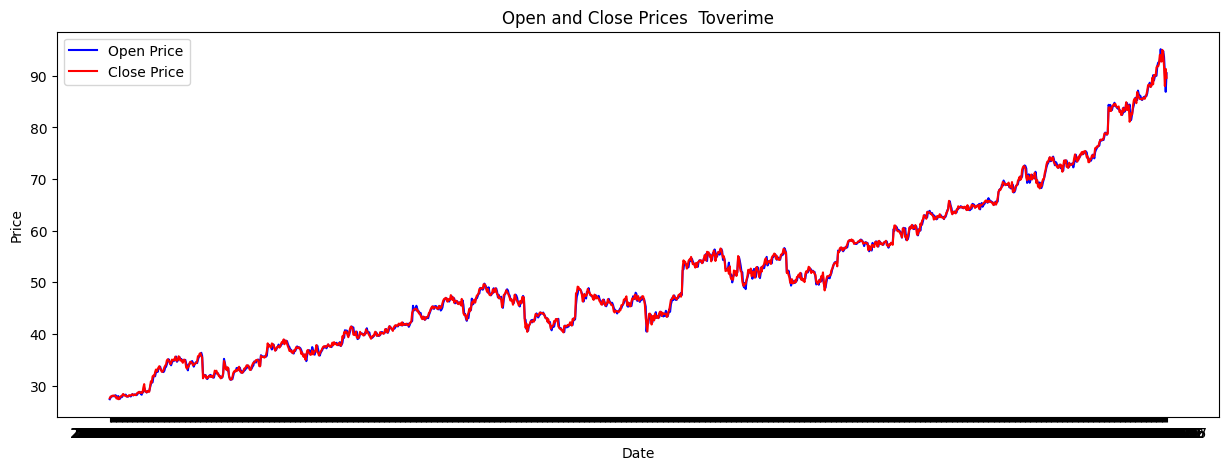

In [10]:
## Plot 1 : Open and Close Prices of time
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['open'], label='Open Price', color='blue')
plt.plot(data['date'], data['close'], label='Close Price', color='red')
plt.title('Open and Close Prices  Toverime')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

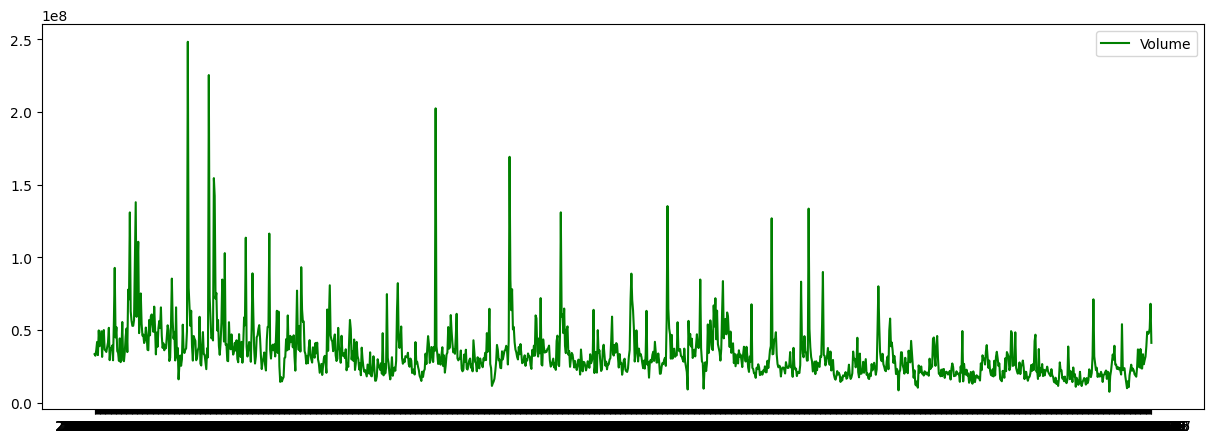

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(data['date'], data['volume'], label='Volume', color = "green")
plt.legend()
plt.show()

##### **2. Pre-Processing of Dataset**

##### 2.1 Remove non-numeric data and checking for correlation

In [12]:
## Remove Non- numeric data
numeric_data = data.select_dtypes(include=["int64", "float64"])
print(numeric_data.head())

    index   open   high    low  close    volume
0  390198  27.35  27.71  27.31  27.55  33318306
1  390199  27.65  27.92  27.50  27.86  32247549
2  390200  27.88  28.00  27.75  27.88  35990829
3  390201  27.93  28.11  27.88  28.03  41715530
4  390202  27.92  28.06  27.87  28.04  32663174


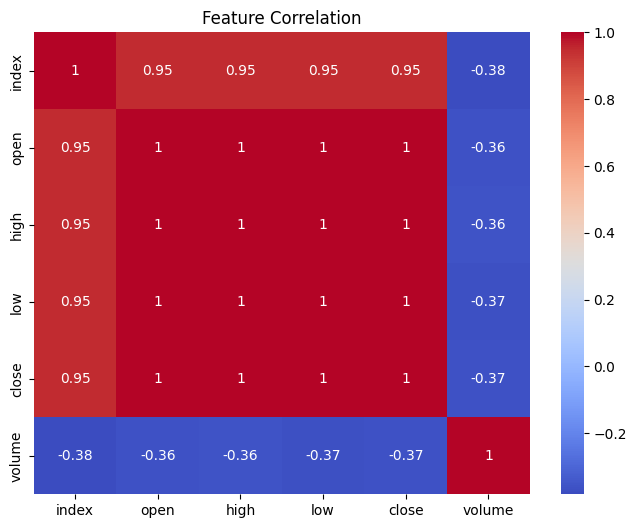

In [17]:
## Plot Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

##### 2.2 Convert the Data into Data Time format and create date filter

In [21]:
# Convert to date to datetime data
data['date'] = pd.to_datetime(data['date'])
prediction = data.loc[
    (data['date'] >= '2013-01-01') & 
    (data['date'] <= '2018-12-31')
    ]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1259 non-null   int64         
 1   date    1259 non-null   datetime64[ns]
 2   open    1259 non-null   float64       
 3   high    1259 non-null   float64       
 4   low     1259 non-null   float64       
 5   close   1259 non-null   float64       
 6   volume  1259 non-null   int64         
 7   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 78.8+ KB
None


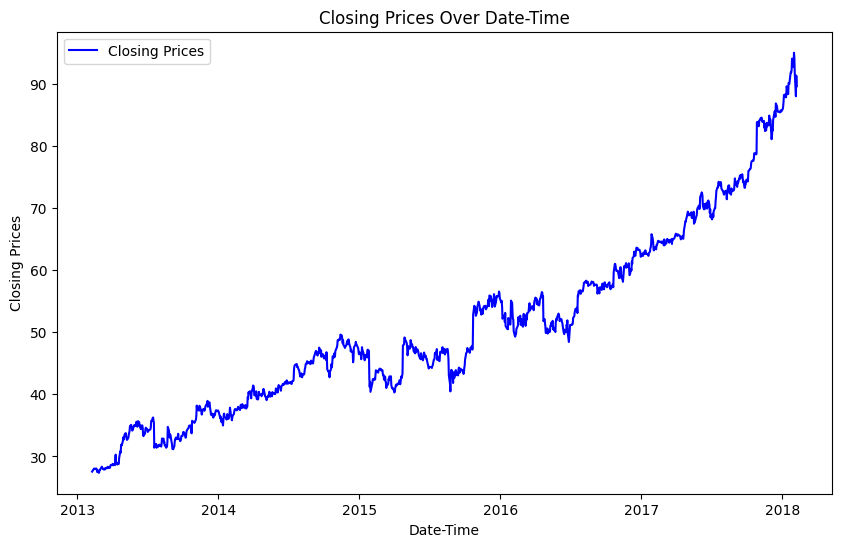

In [25]:
## Plot Closing prices over Date-Time
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['close'], label='Closing Prices', color='blue')
plt.xlabel('Date-Time')
plt.ylabel('Closing Prices')
plt.title('Closing Prices Over Date-Time')
plt.legend()
plt.show()

#### **3 Prepare for the LSTM Model (Sequential)**

##### 3.1 Prepare the data for fitting the Model

In [27]:
## Model will be trained on closing prices of the stocks

stock_close = data["close"]
dataset = stock_close.values
print(dataset.shape)

(1259,)
